<a href="https://colab.research.google.com/github/Visionary-DataWorks/DSPL-Project/blob/main/Gaussian_Naive_Bayes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import python libraries that required
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [ ]:
#load the dataset
cleaned_dataset = pd.read_csv("/content/cleaned_train_data.csv")

In [ ]:
#to view first 6 rows of the dataset
cleaned_dataset.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,city_encoded
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,11
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,13
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,19
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,19
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,11


In [ ]:
#to check data types and missing values
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774148 entries, 0 to 774147
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774146 non-null  float64
 1   outlet_city       774148 non-null  object 
 2   luxury_sales      774148 non-null  float64
 3   fresh_sales       774148 non-null  float64
 4   dry_sales         774148 non-null  float64
 5   cluster_category  774148 non-null  int64  
 6   city_encoded      774148 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 41.3+ MB


In [ ]:
#drop unnecessary columns
x = cleaned_dataset.drop(columns = ["Customer_ID","outlet_city","cluster_category"])#only
y =cleaned_dataset["cluster_category"]#target variable(column need to predict)

In [ ]:
#min and max normalization
x = (x-x.min())/(x.max() - x.min())

Dividing dataset into training and testing (split)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

Build Gaussian Naive Bayes Model

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train) # train the model
y_pred = gnb.predict(x_test)# make predictions on test set



Check model accuracy using classification reports

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Model_accuracy: {accuracy}")

Model_accuracy: 0.7686925445111843


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.84      0.71      0.77     56902
           2       0.73      0.89      0.80     46438
           3       0.75      0.56      0.64     14640
           4       0.72      0.89      0.80     51484
           5       0.62      0.60      0.61     11888
           6       0.85      0.71      0.77     50893

    accuracy                           0.77    232245
   macro avg       0.75      0.72      0.73    232245
weighted avg       0.78      0.77      0.77    232245



Display model performance using a confusion matrix

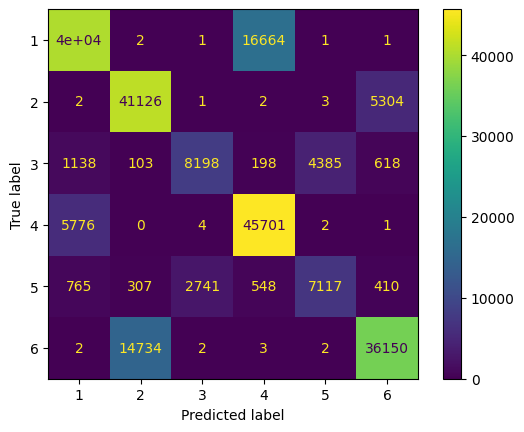

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
gnb_cm = confusion_matrix(y_test,y_pred, labels = gnb.classes_)
gnb_cm = ConfusionMatrixDisplay(gnb_cm, display_labels = gnb.classes_)
gnb_cm.plot()